## Problem Statement
The objective of this project is to develop a machine learning model that recommends personalized and risk-adjusted credit limits for customers based on their financial behavior, credit history, and demographics.

### Import imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
df = pd.read_csv("data/credit_data.csv")
df.head()

,customer_id,age,monthly_income,employment_type,credit_score,existing_credit_cards,avg_monthly_spend,repayment_ratio,missed_payments_last_6m,loan_accounts,location_tier,recommended_credit_limit
0,CUST00001,37,59934,Salaried,708,3,33923,0.68,0,0,Tier 3,75313
1,CUST00002,33,43443,Self-Employed,687,0,22827,0.77,1,3,Tier 1,54455
2,CUST00003,23,94493,Self-Employed,598,2,25489,0.57,1,0,Tier 2,104437
3,CUST00004,50,69266,Self-Employed,748,1,43636,0.78,0,2,Tier 3,92397
4,CUST00005,26,55821,Salaried,669,1,23449,0.74,0,2,Tier 1,72929


In [4]:
df.shape

(5000, 12)

### Describing the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               5000 non-null   object 
 1   age                       5000 non-null   int64  
 2   monthly_income            5000 non-null   int64  
 3   employment_type           5000 non-null   object 
 4   credit_score              5000 non-null   int64  
 5   existing_credit_cards     5000 non-null   int64  
 6   avg_monthly_spend         5000 non-null   int64  
 7   repayment_ratio           5000 non-null   float64
 8   missed_payments_last_6m   5000 non-null   int64  
 9   loan_accounts             5000 non-null   int64  
 10  location_tier             5000 non-null   object 
 11  recommended_credit_limit  5000 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 468.9+ KB


In [6]:
df.describe()

,age,monthly_income,credit_score,existing_credit_cards,avg_monthly_spend,repayment_ratio,missed_payments_last_6m,loan_accounts,recommended_credit_limit
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,34.62680,59961.607600,719.203400,1.502600,26908.474400,0.794718,0.75840,1.521400,96513.071200
std,7.75017,26785.950545,79.330727,1.115277,15278.551722,0.124701,0.92423,1.237355,54895.263767
min,21.00000,15000.000000,398.000000,0.000000,3002.000000,0.300000,0.00000,0.000000,11922.000000
25%,29.00000,40570.000000,665.000000,1.000000,15399.000000,0.710000,0.00000,1.000000,57226.250000
50%,34.00000,57504.000000,720.000000,2.000000,24012.000000,0.800000,1.00000,1.000000,85667.000000
75%,40.00000,76598.250000,772.000000,2.000000,35130.250000,0.890000,1.00000,2.000000,123584.750000
max,61.00000,186741.000000,900.000000,3.000000,113655.000000,1.000000,7.00000,9.000000,355713.000000


In [7]:
# Check for missing values
df.isnull().sum()

customer_id                 0
age                         0
monthly_income              0
employment_type             0
credit_score                0
existing_credit_cards       0
avg_monthly_spend           0
repayment_ratio             0
missed_payments_last_6m     0
loan_accounts               0
location_tier               0
recommended_credit_limit    0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df['employment_type'].value_counts()

employment_type
Salaried         2565
Self-Employed    2435
Name: count, dtype: int64

In [10]:
df['location_tier'].value_counts()

location_tier
Tier 1    1701
Tier 2    1661
Tier 3    1638
Name: count, dtype: int64

In [11]:
df.head()

,customer_id,age,monthly_income,employment_type,credit_score,existing_credit_cards,avg_monthly_spend,repayment_ratio,missed_payments_last_6m,loan_accounts,location_tier,recommended_credit_limit
0,CUST00001,37,59934,Salaried,708,3,33923,0.68,0,0,Tier 3,75313
1,CUST00002,33,43443,Self-Employed,687,0,22827,0.77,1,3,Tier 1,54455
2,CUST00003,23,94493,Self-Employed,598,2,25489,0.57,1,0,Tier 2,104437
3,CUST00004,50,69266,Self-Employed,748,1,43636,0.78,0,2,Tier 3,92397
4,CUST00005,26,55821,Salaried,669,1,23449,0.74,0,2,Tier 1,72929


### Summary Statistics for Key Numerical Columns

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,34.626800,7.750170,21.0,29.00,34.0,40.00,61.0
monthly_income,5000.0,59961.607600,26785.950545,15000.0,40570.00,57504.0,76598.25,186741.0
credit_score,5000.0,719.203400,79.330727,398.0,665.00,720.0,772.00,900.0
existing_credit_cards,5000.0,1.502600,1.115277,0.0,1.00,2.0,2.00,3.0
avg_monthly_spend,5000.0,26908.474400,15278.551722,3002.0,15399.00,24012.0,35130.25,113655.0
repayment_ratio,5000.0,0.794718,0.124701,0.3,0.71,0.8,0.89,1.0
missed_payments_last_6m,5000.0,0.758400,0.924230,0.0,0.00,1.0,1.00,7.0
loan_accounts,5000.0,1.521400,1.237355,0.0,1.00,1.0,2.00,9.0
recommended_credit_limit,5000.0,96513.071200,54895.263767,11922.0,57226.25,85667.0,123584.75,355713.0


### Plot Distributions for Key Features

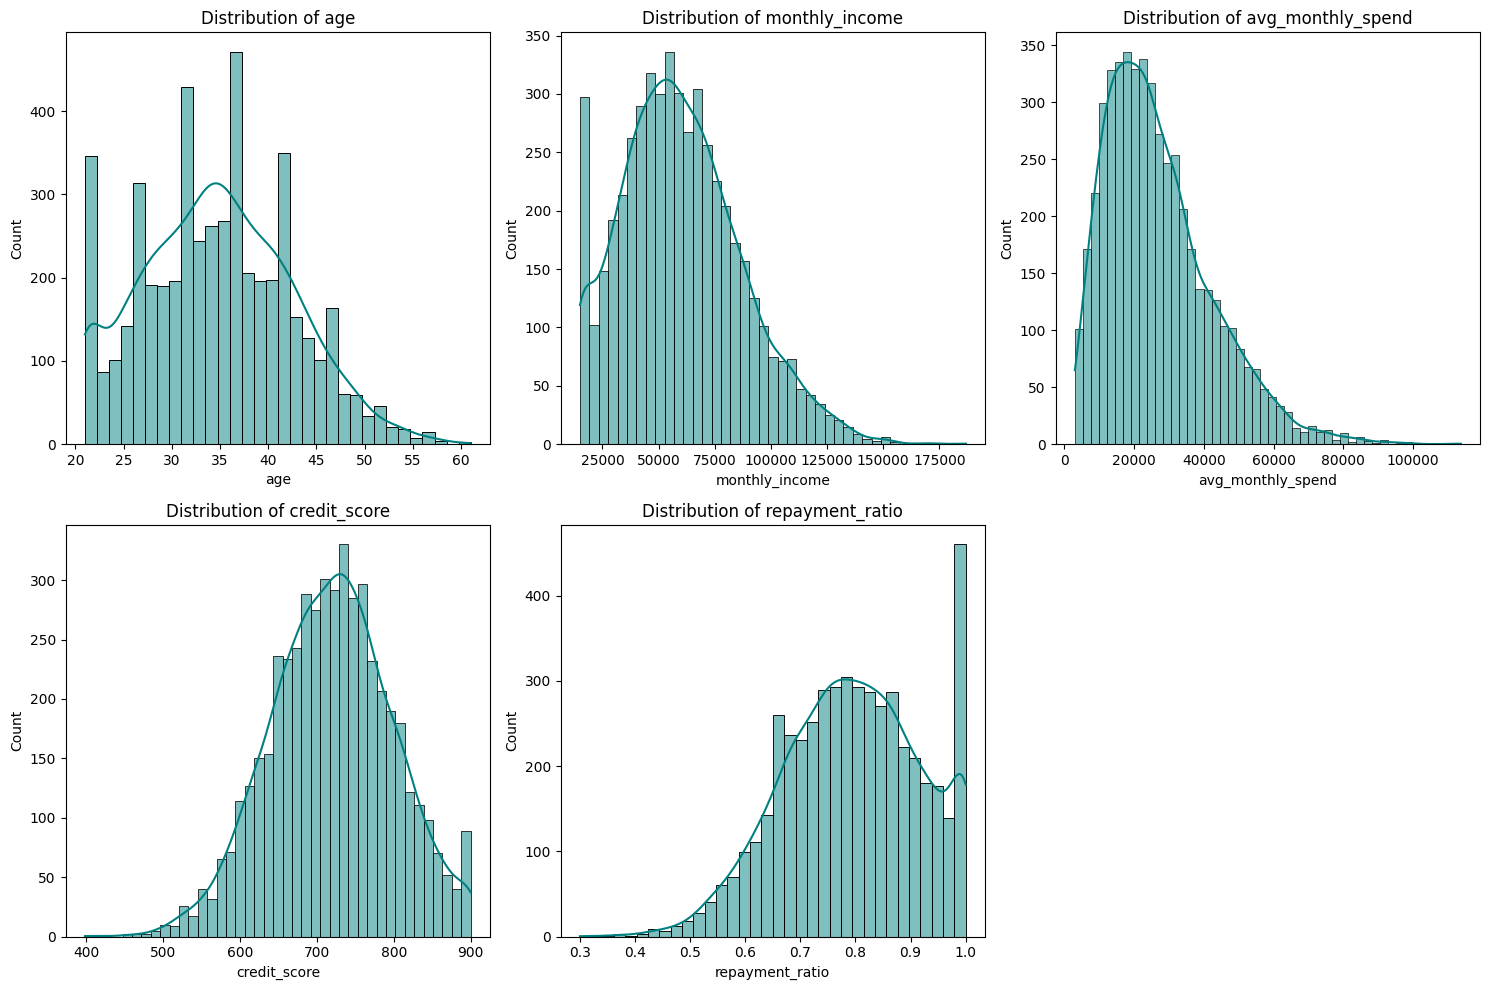

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'monthly_income', 'avg_monthly_spend', 'credit_score', 'repayment_ratio']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


## Detecting Outliers

In [14]:
features = ['monthly_income', 'avg_monthly_spend', 'credit_score']

# Function to calculate IQR boundaries
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Detect and display bounds
for feature in features:
    lower, upper = detect_outliers(df, feature)
    print(f"{feature}: Lower Bound = {lower:.2f}, Upper Bound = {upper:.2f}")


monthly_income: Lower Bound = -13472.38, Upper Bound = 130640.62
avg_monthly_spend: Lower Bound = -14197.88, Upper Bound = 64727.12
credit_score: Lower Bound = 504.50, Upper Bound = 932.50


## Handling Outliers

In [15]:
def cap_outliers(df, feature):
    lower, upper = detect_outliers(df, feature)
    df[feature] = df[feature].clip(lower, upper)
    return df

# Apply capping
for feature in features:
    df = cap_outliers(df, feature)


In [16]:
df.head()

,customer_id,age,monthly_income,employment_type,credit_score,existing_credit_cards,avg_monthly_spend,repayment_ratio,missed_payments_last_6m,loan_accounts,location_tier,recommended_credit_limit
0,CUST00001,37,59934.0,Salaried,708.0,3,33923.0,0.68,0,0,Tier 3,75313
1,CUST00002,33,43443.0,Self-Employed,687.0,0,22827.0,0.77,1,3,Tier 1,54455
2,CUST00003,23,94493.0,Self-Employed,598.0,2,25489.0,0.57,1,0,Tier 2,104437
3,CUST00004,50,69266.0,Self-Employed,748.0,1,43636.0,0.78,0,2,Tier 3,92397
4,CUST00005,26,55821.0,Salaried,669.0,1,23449.0,0.74,0,2,Tier 1,72929


## Feature Engineering

In [17]:
# Income Ratio
df['spend_to_income_ratio'] = df['avg_monthly_spend'] / df['monthly_income']

In [18]:
# Missed Payment Flag (1 if repayment issues, 0 if good)
df['missed_payment_flag'] = (df['repayment_ratio'] < 0.9).astype(int)

In [19]:
# Credit Score Category
def categorize_credit_score(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    else:
        return 'Excellent'

df['credit_category'] = df['credit_score'].apply(categorize_credit_score)

In [21]:
#  Income Category
def categorize_income(income):
    if income < 40000:
        return 'Low'
    elif income < 80000:
        return 'Medium'
    else:
        return 'High'

df['income_category'] = df['monthly_income'].apply(categorize_income)

In [22]:
# Age Bucket
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

df['age_bucket'] = df['age'].apply(categorize_age)

In [23]:
df.head()

,customer_id,age,monthly_income,employment_type,credit_score,existing_credit_cards,avg_monthly_spend,repayment_ratio,missed_payments_last_6m,loan_accounts,location_tier,recommended_credit_limit,spend_to_income_ratio,missed_payment_flag,credit_category,income_category,age_bucket
0,CUST00001,37,59934.0,Salaried,708.0,3,33923.0,0.68,0,0,Tier 3,75313,0.566006,1,Good,Medium,Adult
1,CUST00002,33,43443.0,Self-Employed,687.0,0,22827.0,0.77,1,3,Tier 1,54455,0.525447,1,Good,Medium,Adult
2,CUST00003,23,94493.0,Self-Employed,598.0,2,25489.0,0.57,1,0,Tier 2,104437,0.269745,1,Fair,High,Young
3,CUST00004,50,69266.0,Self-Employed,748.0,1,43636.0,0.78,0,2,Tier 3,92397,0.629977,1,Excellent,Medium,Senior
4,CUST00005,26,55821.0,Salaried,669.0,1,23449.0,0.74,0,2,Tier 1,72929,0.420075,1,Fair,Medium,Young


In [24]:
df.shape

(5000, 17)

## Encoding Categeorical Columns

In [25]:
df.to_csv('processed_data.csv', index=False)